# Loading packages and checking venv and working directory 

In [1]:
import os
import sys
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt

In [2]:
# Checking correct environment 
print(sys.prefix)

/Users/priyansha/Documents/Oxford/Term1/SDS_in_python/Week02/goup-wikipedia-revisions-project/.venv


In [3]:
# Checking current working directory
os.getcwd()

'/Users/priyansha/Documents/Oxford/Term1/SDS_in_python/Week02/goup-wikipedia-revisions-project'

# Loading and displaying data, data types, and data shape

In [4]:
# Loading data 
naomi = pd.read_feather("oii-fsds-wikipedia-main/DataFrames/Naomi Klein.feather")
greta = pd.read_feather("oii-fsds-wikipedia-main/DataFrames/Greta Thunberg.feather")

In [5]:
# Displaying data
display(naomi)
display(greta)

,revision_id,timestamp,username,userid,comment,text_length,year,month
197,1253256754,2024-10-25 02:32:43+00:00,Wellington Bay,43059617,None,75727,2024,10
196,1253256624,2024-10-25 02:31:43+00:00,Wellington Bay,43059617,/* Environmentalism */,75731,2024,10
201,1253256302,2024-10-25 02:29:23+00:00,Wellington Bay,43059617,None,75727,2024,10
202,1253255735,2024-10-25 02:25:01+00:00,Wellington Bay,43059617,None,75727,2024,10
199,1253255606,2024-10-25 02:24:13+00:00,Wellington Bay,43059617,Parents,75724,2024,10
...,...,...,...,...,...,...,...,...
2356,658,2002-01-27 09:17:25+00:00,213.253.39.xxx,0,two one-sentence paras,233,2002,01
2358,543,2002-01-27 06:27:28+00:00,213.253.39.xxx,0,linked manifesto,231,2002,01
2354,511,2002-01-27 05:26:14+00:00,Peter Winnberg,17,Added activist,227,2002,01
2355,505,2002-01-27 05:16:14+00:00,213.253.39.xxx,0,"'female writer' - no, she's a 'Canadian journa...",217,2002,01


,revision_id,timestamp,username,userid,comment,text_length,year,month
329,1252064275,2024-10-19 16:11:21+00:00,Wabbuh,48227547,None,258902,2024,10
338,1250072169,2024-10-08 09:45:25+00:00,CRau080,33923477,/* Pro-Palestinian activism */ Tweet apparentl...,258909,2024,10
339,1250071453,2024-10-08 09:37:50+00:00,CRau080,33923477,/* Pro-Palestinian activism */ ce,258910,2024,10
343,1250069135,2024-10-08 09:15:14+00:00,CRau080,33923477,/* Pro-Palestinian acitivism */ misspelling in...,258911,2024,10
330,1250069064,2024-10-08 09:14:40+00:00,CRau080,33923477,/* Pro-Palestinian acitivism */ ce,258912,2024,10
...,...,...,...,...,...,...,...,...
4851,871636032,2018-12-02 13:09:10+00:00,Gfosankar,17106820,Expand,1417,2018,12
4837,871595450,2018-12-02 04:39:13+00:00,Gfosankar,17106820,/* top */,1019,2018,12
4824,871503251,2018-12-01 14:41:23+00:00,Gfosankar,17106820,Life,1012,2018,12
4888,871498917,2018-12-01 14:00:18+00:00,Gfosankar,17106820,added [[Category:Living people]] using [[WP:HC...,521,2018,12


In [6]:
# Check data types
naomi.dtypes

revision_id                 object
timestamp      datetime64[ns, UTC]
username                    object
userid                      object
comment                     object
text_length                  int64
year                        object
month                       object
dtype: object

In [7]:
print(naomi.shape)
print(greta.shape)

(2426, 8)
(4905, 8)


# Adding year column to data

In [8]:
# Filter data for year 2024 using timestamp column that has datetime data type
naomi["year"] = naomi["timestamp"].dt.year
greta["year"] = greta["timestamp"].dt.year

# Plotting Edits and Editors by year 

In [9]:
# Variables 

# Plot count of edits per year
naomi_counts = naomi.groupby("year").size()
greta_counts = greta.groupby("year").size()

# Plot count of unique editors per year
naomi_unique_counts = naomi.groupby("year")["username"].nunique()
greta_unique_counts = greta.groupby("year")["username"].nunique()

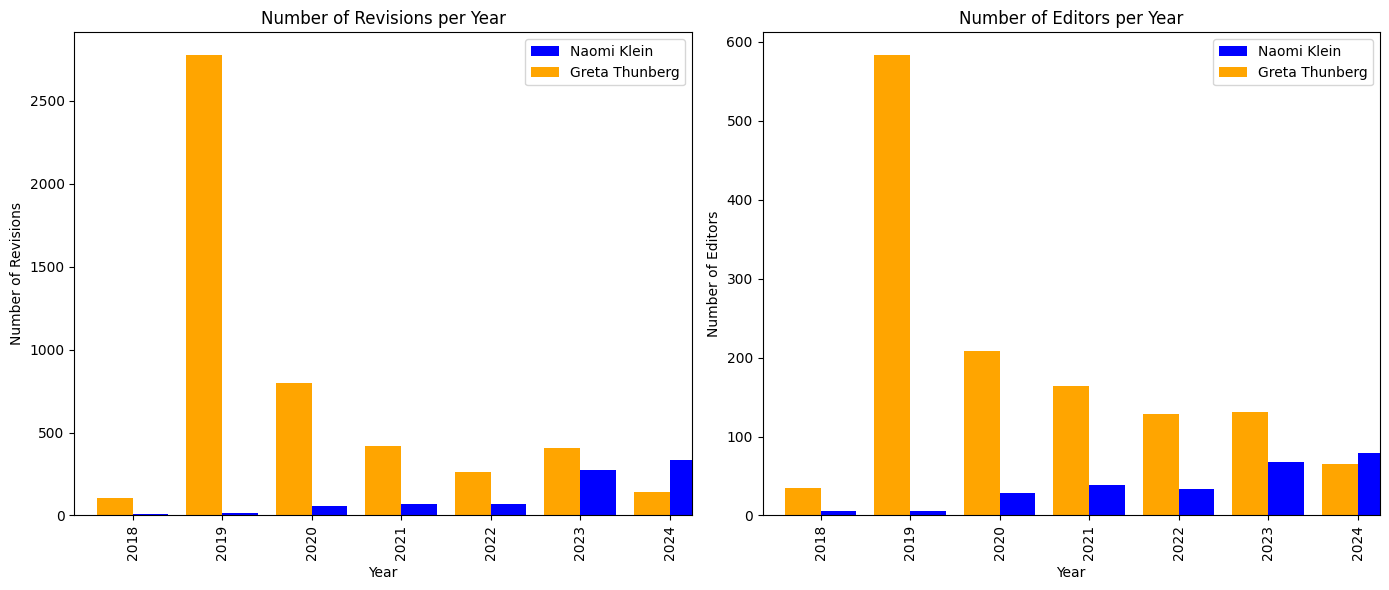

In [10]:
# Plot count of users per year for Naomi Klein and Greta Thunberg on same plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot count of revisions per year
naomi_counts.plot(kind='bar', ax=ax1, position=0, width=0.4, label="Naomi Klein", color='blue')
greta_counts.plot(kind='bar', ax=ax1, position=1, width=0.4, label="Greta Thunberg", color='orange')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Revisions")
ax1.set_title("Number of Revisions per Year")
ax1.legend()

naomi_unique_counts.plot(kind='bar', ax=ax2, position=0, width=0.4, label="Naomi Klein", color='blue')
greta_unique_counts.plot(kind='bar', ax=ax2, position=1, width=0.4, label="Greta Thunberg", color='orange')

ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Editors")
ax2.set_title("Number of Editors per Year")
ax2.legend()

plt.tight_layout()
plt.show()


# Usernames common to both Naomi Klein and Greta Thunberg

In [11]:
# Display usernames that are common in both dataframes
naomi_unique = naomi.drop_duplicates(subset='username')
greta_unique = greta.drop_duplicates(subset='username')
common_users = pd.merge(naomi_unique['username'], greta_unique['username'], on="username", how="inner")

display(common_users)
common_users["username"].value_counts()

,username
0,None
1,GreenC bot
2,Smasongarrison
3,Paul Erik
4,WikiCleanerBot
...,...
61,Alexius08
62,MER-C
63,The wub
64,Treybien


username
GreenC bot         1
ClueBot NG         1
C.J. Griffin       1
BrownHairedGirl    1
Sdkb               1
                  ..
X1\                1
Acroterion         1
Gildsons           1
J 1982             1
Liftarn            1
Name: count, Length: 65, dtype: int64

In [12]:
# create a new column in each dataframe to indicate whether the user is in common_users
greta["common_user"] = greta["username"].isin(common_users["username"])
naomi["common_user"] = naomi["username"].isin(common_users["username"])

In [13]:
greta.head()
naomi.head()

,revision_id,timestamp,username,userid,comment,text_length,year,month,common_user
197,1253256754,2024-10-25 02:32:43+00:00,Wellington Bay,43059617,None,75727,2024,10,False
196,1253256624,2024-10-25 02:31:43+00:00,Wellington Bay,43059617,/* Environmentalism */,75731,2024,10,False
201,1253256302,2024-10-25 02:29:23+00:00,Wellington Bay,43059617,None,75727,2024,10,False
202,1253255735,2024-10-25 02:25:01+00:00,Wellington Bay,43059617,None,75727,2024,10,False
199,1253255606,2024-10-25 02:24:13+00:00,Wellington Bay,43059617,Parents,75724,2024,10,False


In [14]:
# sum of common_user column in each dataframe
print(greta["common_user"].sum())
print(naomi["common_user"].sum())

800
913


# Plotting number of edits and number of editors with common usernames

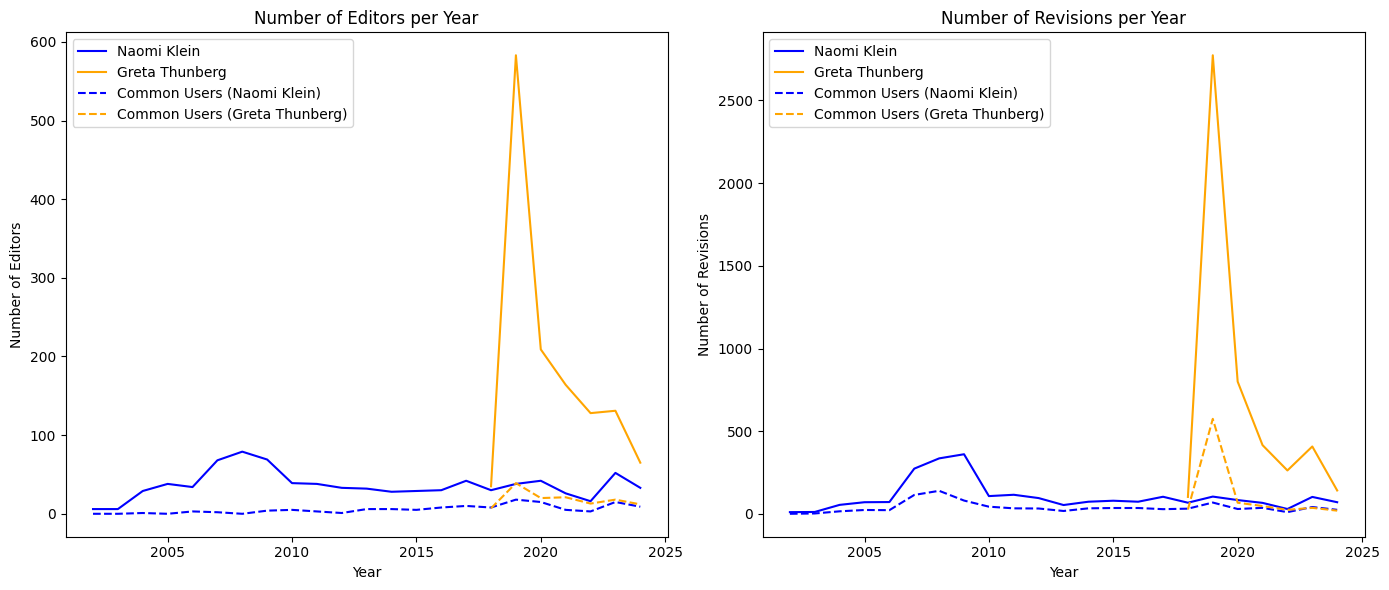

In [15]:
# Calculate counts and unique counts
naomi_counts = naomi.groupby("year").size()
greta_counts = greta.groupby("year").size()

naomi_user_counts = naomi.groupby("year")["username"].nunique()
greta_user_counts = greta.groupby("year")["username"].nunique()

# Highlight common users
naomi_common_counts = naomi[naomi["common_user"]].groupby("year").size()
greta_common_counts = greta[greta["common_user"]].groupby("year").size()

naomi_common_user_counts = naomi[naomi["common_user"]].groupby("year")["username"].nunique()
greta_common_user_counts = greta[greta["common_user"]].groupby("year")["username"].nunique()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot count of users per year for Naomi Klein and Greta Thunberg on the first subplot
naomi_user_counts.plot(kind='line', ax=ax1, label="Naomi Klein", color='blue')
greta_user_counts.plot(kind='line', ax=ax1, label="Greta Thunberg", color='orange')
naomi_common_user_counts.plot(kind='line', ax=ax1, label="Common Users (Naomi Klein)", color='blue', linestyle='--')
greta_common_user_counts.plot(kind='line', ax=ax1, label="Common Users (Greta Thunberg)", color='orange', linestyle='--')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Editors")
ax1.set_title("Number of Editors per Year")
ax1.legend()

# Plot count of revisions per year for Naomi Klein and Greta Thunberg on the second subplot
naomi_counts.plot(kind='line', ax=ax2, label="Naomi Klein", color='blue')
greta_counts.plot(kind='line', ax=ax2, label="Greta Thunberg", color='orange')
naomi_common_counts.plot(kind='line', ax=ax2, label="Common Users (Naomi Klein)", color='blue', linestyle='--')
greta_common_counts.plot(kind='line', ax=ax2, label="Common Users (Greta Thunberg)", color='orange', linestyle='--')

ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Revisions")
ax2.set_title("Number of Revisions per Year")
ax2.legend()

plt.tight_layout()
plt.show()


# Bots

In [16]:
# Calculate number of common users that are also bots
common_users["bot"] = common_users["username"].str.contains("bot", case=False, na=False)
common_users["bot"].value_counts()

bot
False    51
True     15
Name: count, dtype: int64

In [19]:
# calculate percentage of common users that are bots
print(common_users.shape[0])
print(common_users["bot"].mean())

66
0.22727272727272727


# User ID vs username

In [21]:
# Check if number of unique usernames matches unique userids in both dataframes
print(naomi["username"].nunique())
print(naomi["userid"].nunique())
print(greta["username"].nunique())
print(greta["userid"].nunique())

674
674
1072
1072
